<a href="https://colab.research.google.com/github/Abiola97/ajaoabiola0812/blob/main/SCT_DS_02_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 02: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify 1 patterns and trends in the data. walk me through.**

LOADING LIBRARIES:This is necessary for data manipulation, trasnformation and visualization.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATASET: importing the train data of the Titanic Dataset using pandas function

In [ ]:
train_df = pd.read_csv('/content/train.csv')

VIEWING THE DATA: We use head() to view first few rows, info() for general information such as checking data types, non-null values, describe() gives the summary statistics of the dataset

In [ ]:
print(train_df.head())
print(train_df.info())
print(train_df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### We find and replace blank rows in our dataset

**Finding blank rows**

In [ ]:
print(train_df.isnull().sum()) #FINDING THECOLUMNS WITH BLANK ROWS

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


From the result above, we can see that column age has 177 blank rows whith cabin column has the highest blank rows of 687

**Filling blank rows of Age column with Median value, blank rows in Embarked column replaced by Modal value**

In [ ]:
print(train_df['Age'].fillna(train_df['Age'].median())) #FILL BLANK ROWS IN  COLUMN AGE WITH MEDIAN  VALUE
print(train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])) #FILL BLANK ROWS IN COLUMN EMBARKED WITH MODE VALUE(O)
if 'Cabin' in train_df.columns:
    train_df.drop('Cabin', axis=1, inplace=True)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


# **EXPLORATORY DATA ANALYSIS**

UNIVARIATE ANALYSIS; ANALYSING ONE VARIBALE INDEPENDENTLY(Disribution of Ages across the dataset).

In [ ]:
# Create an interactive histogram with tooltips
fig = px.histogram(train_df, x="Age", nbins=10, marginal="rug",
                   title="Distribution of Age", labels={'Age': 'Age', 'count': 'Frequency'},
                   hover_data={"Age": True})

fig.update_layout(bargap=0.05)  # Adjust bar spacing
fig.show()

The Modal Age range is 25-35 Years with frequency of 201. This implies that majority of the partcipants who onboarded the Titanic ship fall within 25-35 years.

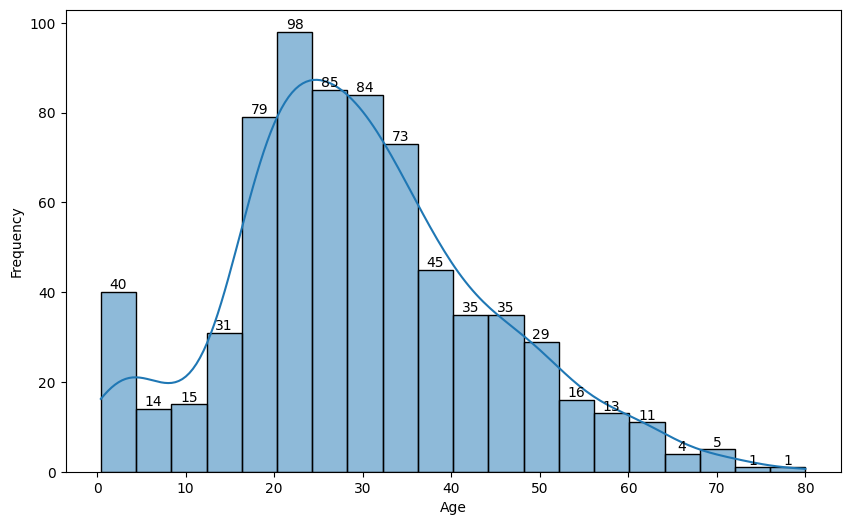

In [ ]:
# Plot histograms
plt.figure(figsize=(10, 6))
ax = sns.histplot(train_df['Age'].dropna(), kde=True, bins=20)
# Showing Data Label
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label bars with data
        ax.text(patch.get_x() + patch.get_width() / 2, height,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The Modal Age range is 20-25 Years with frequency of 98. This implies that majority of the partcipants who onboarded the Titanic ship fall within 20-25 years.

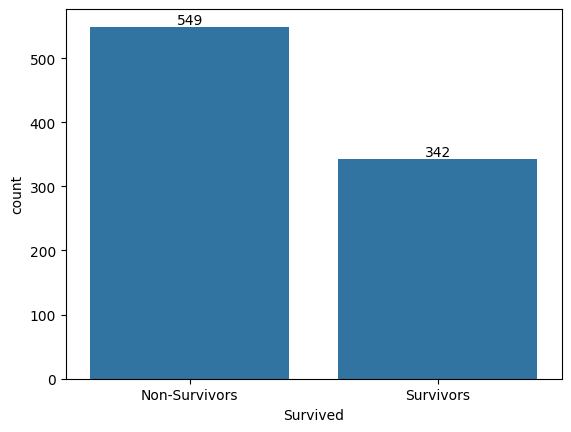

In [ ]:
 ax = sns.countplot(x='Survived', data=train_df)
# Showing Data Label
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only label bars with data
        ax.text(patch.get_x() + patch.get_width() / 2, height,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()


From the bar plot above, survival rate of passengers is estimated at 38%.

**BIVARIATE ANALYSIS; ANAYLSING THE RELATIONSHIP BETWEEN SET OF TWO VARIABLES**

In [ ]:
# Scatter plot of Age vs. Fare with tooltips using Plotly Express
fig = px.scatter(train_df, x="Age", y="Fare", hover_data=['Age', 'Fare'])
fig.update_layout(title="Age vs. Fare", xaxis_title="Age", yaxis_title="Fare")
fig.show()


From the scatterplot above the passengers who form the working population(20-65) paid higher fares compared to the children and older generation

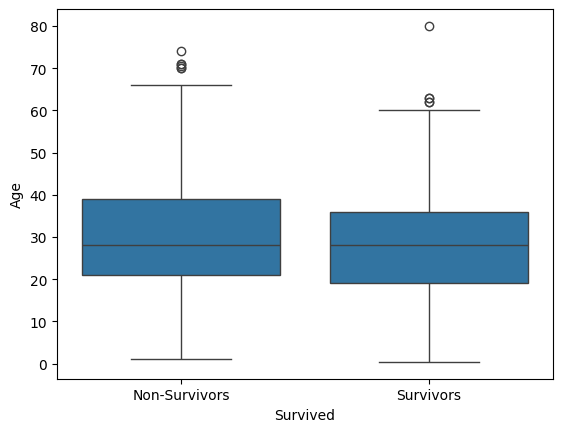

In [ ]:
# Box plot of Age vs. Survived
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()

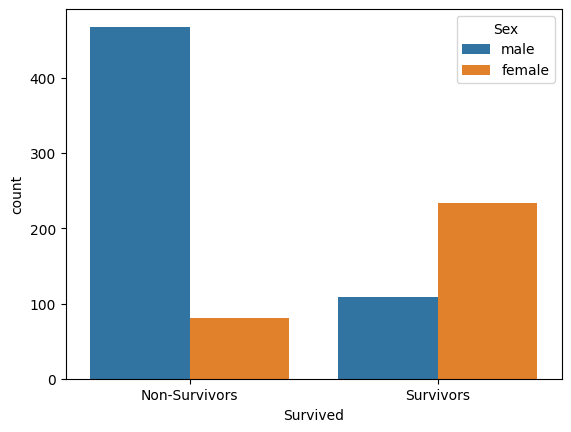

In [ ]:
# Count plot of Survived by Sex
sns.countplot(x='Survived', hue ='Sex', data=train_df)
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()


Survivors comprised mostly of females while majority of males didnt survive. Which tallies with the story and details surrounding the disaster.

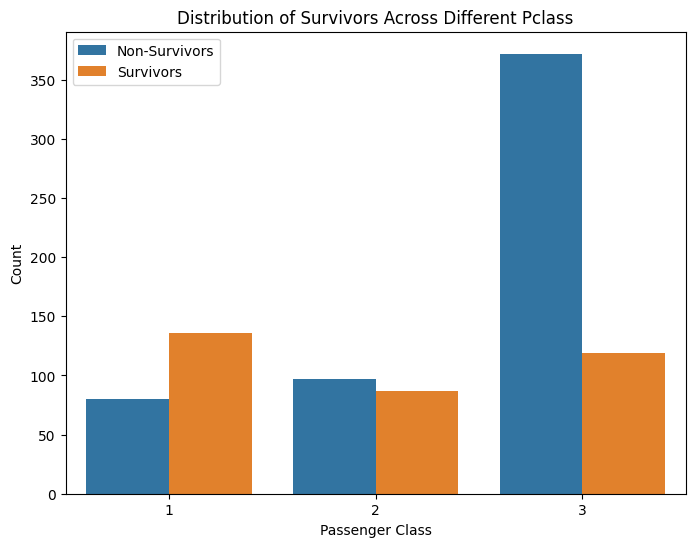

In [ ]:
# Count plot of Survived by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Distribution of Survivors Across Different Pclass')
plt.xlabel('Passenger Class')
plt.legend(['Non-Survivors', 'Survivors'])
plt.ylabel('Count')
plt.show()

3rd Class passengers recorded the highest number of death while the 1st Class had the highest number of survivors. This coborated with the story and facts surrounding the event which highlighted that majority of passengers in the 3rd class comprised mostly of crew members working in the engine of the ship.Priority was given to the women in upper class first.

EXTRACTING MORE INFORMATION FROM AVAILABLE DATSET (Title, Famile Size)

In [ ]:
# Extract title from Name
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

ENCODING CATEGORICAL VARIABLES

In [ ]:
# One-Hot Encoding for Sex
train_df = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)

# Label Encoding for Embarked
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

OUTLIER DETECTION AND HANDLING

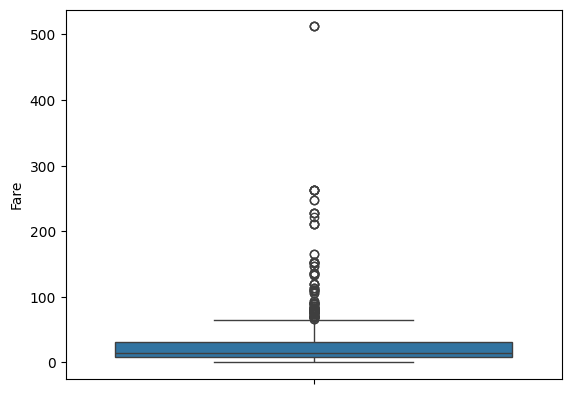

In [ ]:
# Example: Box plot for Fare to identify outliers
sns.boxplot(train_df['Fare'])
plt.show()

DATA TRASNFORMATION

In [ ]:
# StandardScaler for numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'FamilySize']
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])